In [46]:
import numpy as np
import matplotlib.pyplot as plt
from mpl_toolkits.mplot3d import Axes3D

#create class for chosen function = Three hump camel function (2 vars, 3 local minima, long shallow valley)
class f_y(object):
  def __init__(self):
    pass
  
  def evaluate_function(self, x1, x2): 
    y = 2*x1**2-1.05*x1**4+x1**6/6+x1*x2+x2**2
    return y
  
  def evaluate_derivative(self, x1, x2): #for gradient calculation 
    dx1 = 4*x1-4.2*x1**3+x1**5+x2 
    dx2 = x1+2*x2
    return dx1, dx2
 
  
#create class for plain vanilla GD optimisation #with step size=0.0001
#iterate 10000 times with stepsize 0.0001 and specified threshold
class grad_desc_alg(object):
  def __init__(self, function, learn_rate = 0.0001, max_epoch = 10000, thres = 1e-5): 
    self.learn_rate = learn_rate
    self.max_epoch = max_epoch
    self.thres = thres
    self.function = function
  
  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.evaluate_derivative(x1, x2)
    
    new_x1 = x1 - self.learn_rate * dx1
    new_x2 = x2 - self.learn_rate * dx2
    
    return new_x1, new_x2, dx1, dx2
  
  def optimise(self, start_x1 = 1, start_x2 = 1): 
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.evaluate_function(start_x1, start_x2)]
    
    
    for epoch in range(self.max_epoch):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[epoch], all_x2[epoch])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.evaluate_function(x1, x2)
      all_y.append(y)
      
      print("epoch", epoch, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.thres): #apply threshold 
        break
    
    return all_x1, all_x2, all_y

function1 = f_y()
gd = grad_desc_alg(function = function1)

#output the path 
all_x1, all_x2, all_y = gd.optimise()



epoch 0 x1 0.99982 x2 0.9997 y 3.1154427523517225
epoch 1 x1 0.9996399652084275 x2 0.9994000780000001 y 3.114219180656414
epoch 2 x1 0.999459895621832 x2 0.9991002339878793 y 3.112995951349782
epoch 3 x1 0.9992797912367938 x2 0.9988004679515196 y 3.111773064201043
epoch 4 x1 0.9990996520499226 x2 0.9985007798788056 y 3.110550518979588
epoch 5 x1 0.9989194780578585 x2 0.9982011697576249 y 3.109328315454982
epoch 6 x1 0.9987392692572717 x2 0.9979016375758676 y 3.108106453396966
epoch 7 x1 0.9985590256448627 x2 0.9976021833214267 y 3.1068849325754546
epoch 8 x1 0.9983787472173618 x2 0.997302806982198 y 3.105663752760538
epoch 9 x1 0.9981984339715297 x2 0.9970035085460798 y 3.1044429137224814
epoch 10 x1 0.9980180859041574 x2 0.9967042880009734 y 3.103222415231725
epoch 11 x1 0.9978377030120661 x2 0.9964051453347829 y 3.102002257058885
epoch 12 x1 0.9976572852921071 x2 0.9961060805354147 y 3.100782438974752
epoch 13 x1 0.9974768327411622 x2 0.9958070935907785 y 3.099562960750294
epoch 14 x

In [47]:
#for comparison of performance of plain vanilla GD with different stepsizes 
min_y = min(all_y)
print("min y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y])) #much better results then with stepsize=0.0005 

min y: 0.005114320240766271
min(x1, x2) is (-0.0037383778076813924, 0.0732124673240082)


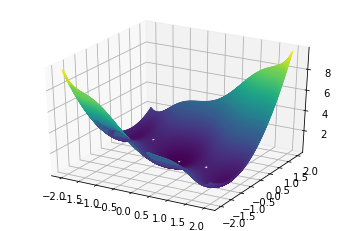

In [50]:
#experiments with stepsize 
class grad_desc_alg(object):
  def __init__(self, function, learn_rate = 0.00005, max_epoch = 1000, thres = 1e-5):
    self.learn_rate = learn_rate
    self.max_epoch = max_epoch
    self.thres = thres
    self.function = function
 #step size = 0.00005 
  def grad_desc(self, x1, x2):
    
    dx1, dx2 = self.function.evaluate_derivative(x1, x2)
    
    new_x1 = x1 - self.learn_rate * dx1
    new_x2 = x2 - self.learn_rate * dx2
    
    return new_x1, new_x2, dx1, dx2
  
  def optimise(self, start_x1 = -9, start_x2 = 1):
    all_x1 = [start_x1]
    all_x2 = [start_x2]
    all_y = [self.function.evaluate_function(start_x1, start_x2)]
    
    
    for epoch in range(self.max_epoch):
      x1,x2,dx1,dx2 = self.grad_desc(all_x1[epoch], all_x2[epoch])
      
      all_x1.append(x1)
      all_x2.append(x2)
      y = self.function.evaluate_function(x1, x2)
      all_y.append(y)
      
      print("epoch", epoch, "x1", x1,"x2", x2,"y", y)
      
      if (np.abs(dx1) + np.abs(dx2)  < 2*self.thres):
        break
    
    return all_x1, all_x2, all_y

function1 = f_y()
gd = grad_desc_alg(function = function1)

all_x1, all_x2, all_y = gd.optimise()



epoch 0 x1 -6.1988900000000005 x2 1.00035 y 7977.789028392722
epoch 1 x1 -5.790065723748615 x2 1.0005599095000002 y 5162.001773468013
epoch 2 x1 -5.504343614529169 x2 1.0007493567952377 y 3727.5782405436653
epoch 3 x1 -5.285676949169296 x2 1.0009244990402846 y 2866.5723319851804
epoch 4 x1 -5.109393661331301 x2 1.001088690437839 y 2297.7796632821464
epoch 5 x1 -4.962325518992546 x2 1.0012440512518619 y 1897.219531443189
epoch 6 x1 -4.836592795949681 x2 1.0013920431226864 y 1601.8356735157731
epoch 7 x1 -4.7271022399056895 x2 1.0015337335581715 y 1376.2689882613304
epoch 8 x1 -4.630371967246799 x2 1.001669935296811 y 1199.219324048236
epoch 9 x1 -4.543917689953158 x2 1.0018012869016437 y 1057.1288194510994
epoch 10 x1 -4.465905959171329 x2 1.0019283026574513 y 940.9809643881044
epoch 11 x1 -4.394946003896358 x2 1.0020514051251441 y 844.560916058485
epoch 12 x1 -4.329958558355112 x2 1.0021709472848264 y 763.4552746401993
epoch 13 x1 -4.270089851412818 x2 1.0022872281180157 y 694.44974113

In [51]:
#for comparison, initial step size is better, local minimum is found here 
min_y = min(all_y)
print("min y:", min(all_y))

index_min_y = all_y.index(min_y)

print("min(x1, x2) is",(all_x1[index_min_y], all_x2[index_min_y]))

min y: 0.7657339543851225
min(x1, x2) is (-1.9799766881006409, 1.0165014194671338)


In [0]:
 
#plot graph for plain vanilla GD output 
Axes3D = Axes3D 

all_x1 = np.linspace(-2,2)
all_x2 = np.linspace(-2,2)

X1, X2= np.meshgrid(all_x1, all_x2)
Z = function1.evaluate_function(X1,X2)

fig = plt.figure()
ax = plt.axes(projection='3d')
ax.contour3D(X1,X2,Z,1000)
plt.show()
